In [ ]:
"""
BSc Computer Science
Module: CM3015 - Machine Learning and Neural Networks
Coursework: Midterm Assignment Code 
Session: April to September 2024 
Student name: Zinhle Maurice-Mopp
Student number: 210125870

Project: Predicting the Impact of Maize Supply Fluctuations and El Niño Weather Patterns on Food Price Inflation in South Africa

Description:

- This project aims to systematically compare the performance and insights derived from Decision Trees and Bayesian Classification 
  algorithms in predicting the influence of white maize supply variability and El Niño weather patterns on food price inflation in 
  South Africa. 
  
- The goal is to evaluate the accuracy and reliability of these algorithms in predicting maize supply and price trends and to determine 
  which algorithm provides more effective and actionable insights for policymakers and stakeholders in the agricultural sector.

The code is divided into modular steps according to the coursework brief.

Steps: 

1. Data Collection and Preprocessing: Integrate maize price data with climatic anomaly data to create a comprehensive dataset for analysis.

2. Exploratory Data Analysis (EDA): Visualise data distributions, correlations, and time series trends to gain insights into the 
                                    underlying patterns.

3. Feature Engineering and Data Splitting: Create new features and prepare the dataset for modelling by handling missing values and 
                                           splitting the data into training and testing sets.

4. Decision Tree Implementation: Develop a Decision Tree model from scratch, train it on the dataset, and evaluate its performance using 
                                 regression metrics.

5. Naive Bayes Implementation: Develop a Naive Bayes classifier from scratch, train it on the dataset, and evaluate its performance using 
                               classification metrics.
   
6. Model Comparison and Evaluation: Compare the models' performances, print key findings, and display results.

7. Insights and Recommendations: Summarize the performance of the Decision Tree and Naive Bayes models, then outline key findings and 
                                 recommendations based on the analysis

By following these steps, this project aims to compare the performance of Decision Trees and Naive Bayes classifiers in predicting the 
impact of maize supply fluctuations and El Niño weather patterns on food prices in South Africa.

"""

In [86]:
"""

1. Data Collection and Preprocessing

Implementation: 

- Reads the NINO3.4 SST anomaly data from a text file and converts it to a CSV format for easier manipulation and analysis.

- Reads maize meal price data from an Excel file and extracts the relevant price information for the specified dates.

- Merges the maize price data with the filtered NINO3.4 data based on matching dates.

- The output confirms that the NINO3.4 data has been successfully converted to a CSV file, making it accessible for further processing. 

- The extracted prices are formatted with a 'R' prefix and stored in a dictionary for further analysis.

- The combined data provides a dataset that includes both maize price and climate anomaly information, which is then saved to a CSV file.

"""

import pandas as pd

# Read and convert the NINO3.4 SST Anomaly data to CSV
file_path_nino = 'nino34_anomalies.txt'
nino_data = pd.read_csv(file_path_nino, delim_whitespace=True)

# Save the NINO3.4 data to a CSV file
csv_file_path_nino = 'nino34_anomalies.csv'
nino_data.to_csv(csv_file_path_nino, index=False)
print(f"NINO3.4 data has been successfully converted to CSV format and saved to {csv_file_path_nino}")

# Read the specific maize meal price data from the Excel sheet
file_path_prices = '2024-05_STATS_SA_Food_prices.xlsx'
food_prices_df = pd.read_excel(file_path_prices, sheet_name='Stats SA Food Prices')

# Extract the relevant maize meal price data
price_dates = [
    '2023/05/01', '2023/06/01', '2023/07/01', '2023/08/01', '2023/09/01', '2023/10/01',
    '2023/11/01', '2023/12/01', '2024/01/01', '2024/02/01', '2024/03/01', '2024/04/01', '2024/05/01'
]
price_columns = [
    'Unnamed: 281', 'Unnamed: 282', 'Unnamed: 283', 'Unnamed: 284', 'Unnamed: 285', 'Unnamed: 286',
    'Unnamed: 287', 'Unnamed: 288', 'Unnamed: 289', 'Unnamed: 290', 'Unnamed: 291', 'Unnamed: 292', 'Unnamed: 293'
]

prices = [f"R{food_prices_df.loc[16, col]}" for col in price_columns]

maize_price_data = {
    "Date": price_dates,
    "Price (R)": prices
}

# Filter NINO3.4 data for the specified date range and combine with maize price data
nino_data['Date'] = pd.to_datetime(nino_data['YR'].astype(str) + '-' + nino_data['MON'].astype(str) + '-01')
date_range = pd.to_datetime(price_dates)

filtered_nino_data = nino_data[nino_data['Date'].isin(date_range)]

# Combine the maize price data with the filtered NINO3.4 data
combined_data = pd.DataFrame(maize_price_data).reset_index(drop=True)
combined_data['YR'] = filtered_nino_data['YR'].values
combined_data['MON'] = filtered_nino_data['MON'].values
combined_data['TOTAL'] = filtered_nino_data['TOTAL'].values
combined_data['ClimAdjust'] = filtered_nino_data['ClimAdjust'].values
combined_data['ANOM'] = filtered_nino_data['ANOM'].values

# Save the combined data to a CSV file
combined_csv_file_path = 'combined_data.csv'
combined_data.to_csv(combined_csv_file_path, index=False)

print("Combined data has been successfully saved to", combined_csv_file_path)

# Output the combined data table
print(combined_data)

NINO3.4 data has been successfully converted to CSV format and saved to nino34_anomalies.csv
Combined data has been successfully saved to combined_data.csv
          Date Price (R)    YR  MON  TOTAL  ClimAdjust  ANOM
0   2023/05/01     R68.9  2023    5  28.39       27.94  0.46
1   2023/06/01    R69.15  2023    6  28.56       27.73  0.84
2   2023/07/01    R67.82  2023    7  28.31       27.29  1.02
3   2023/08/01    R66.55  2023    8  28.20       26.86  1.35
4   2023/09/01    R67.22  2023    9  28.32       26.72  1.60
5   2023/10/01    R68.34  2023   10  28.44       26.72  1.72
6   2023/11/01    R69.03  2023   11  28.72       26.70  2.02
7   2023/12/01    R66.59  2023   12  28.63       26.60  2.02
8   2024/01/01    R68.02  2024    1  28.37       26.55  1.82
9   2024/02/01     R66.6  2024    2  28.28       26.76  1.52
10  2024/03/01    R66.88  2024    3  28.42       27.29  1.12
11  2024/04/01    R68.52  2024    4  28.60       27.83  0.78
12  2024/05/01    R67.29  2024    5  28.17       27

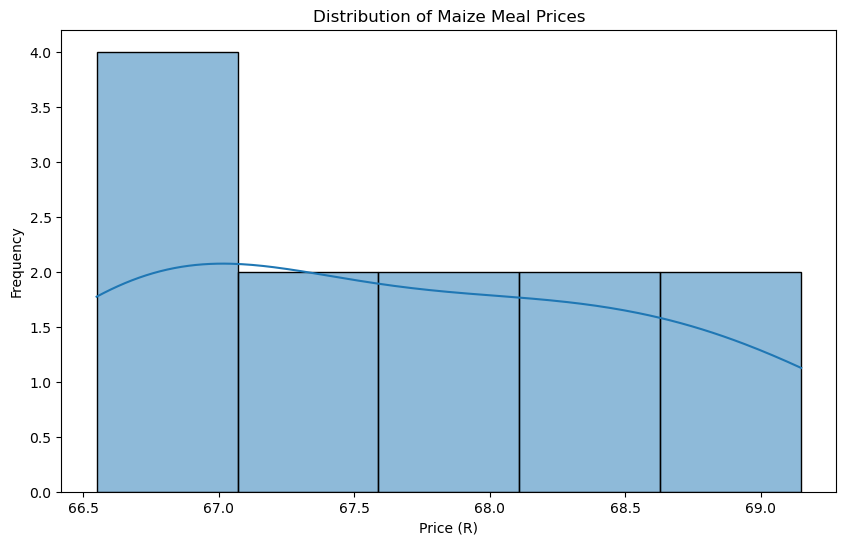

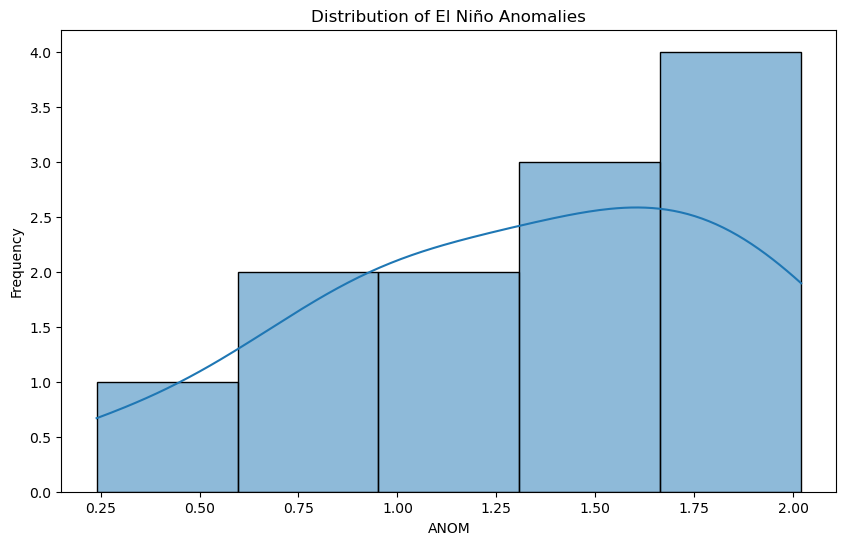

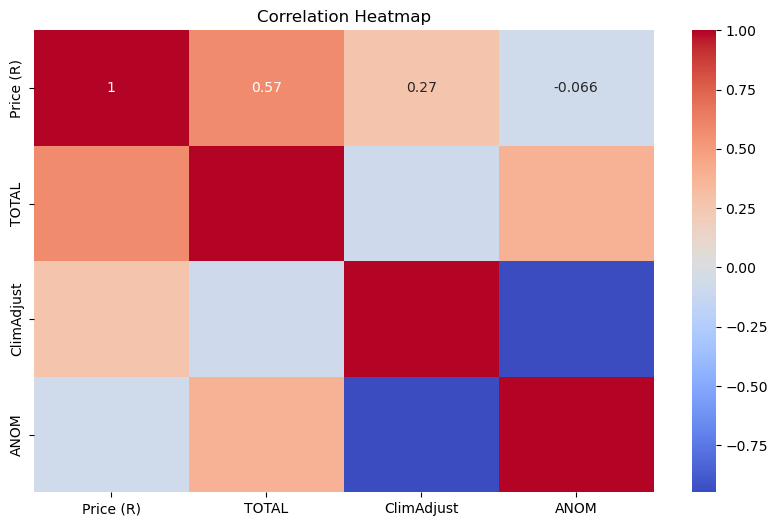

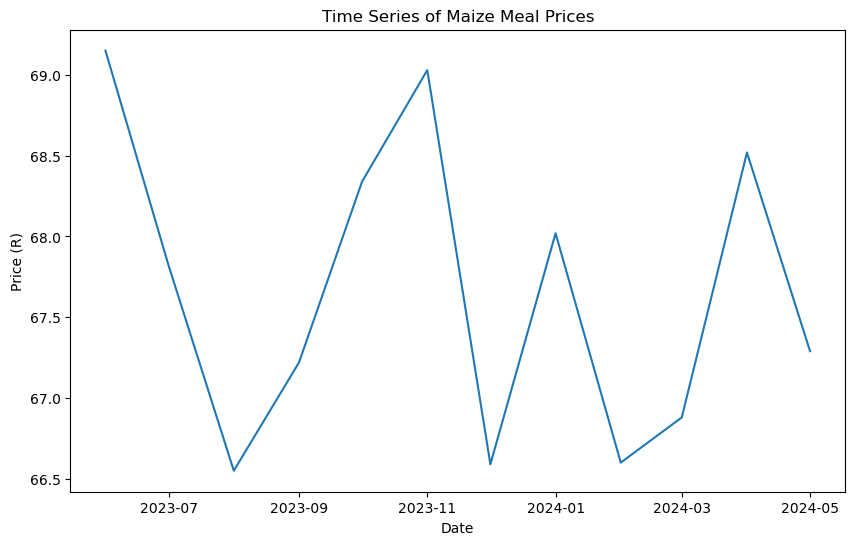

In [136]:
"""
2. Exploratory Data Analysis (EDA)

Purpose: Visualise the distributions of maize meal prices and El Niño anomalies, identify correlations, and plot time series data.

- Distribution histograms:
Purpose: These plots show how the maize prices and anomalies are distributed. 

Interpretation: The distribution plots help identify the central tendency, variability, and any potential outliers in the data.
                Peaks in the distribution indicate the most common values.
 
- Correlation heatmap:

Purpose: This heatmap shows the correlation between different variables in the combined dataset.

Interpretation: The heatmap helps identify the strength and direction of relationships between variables, which can guide feature selection
                and model development.
                Strong correlations (close to 1 or -1) suggest a linear relationship.

- Time series plot:

  Purpose: This line plot illustrates the time series of maize meal prices over the specified date range.
  
  Interpretation: The plot helps identify trends, seasonality, and any abrupt changes in maize meal prices over time.

"""

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Maize Meal Prices
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['Price (R)'].apply(lambda x: float(x.replace('R', '')) if isinstance(x, str) else x), kde=True)
plt.title('Distribution of Maize Meal Prices')
plt.xlabel('Price (R)')
plt.ylabel('Frequency')
plt.show()

# Distribution of El Niño Anomalies
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['ANOM'], kde=True)
plt.title('Distribution of El Niño Anomalies')
plt.xlabel('ANOM')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(combined_data[['Price (R)', 'TOTAL', 'ClimAdjust', 'ANOM']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Time series plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y=combined_data['Price (R)'].apply(lambda x: float(x.replace('R', '')) if isinstance(x, str) else x), data=combined_data)
plt.title('Time Series of Maize Meal Prices')
plt.xlabel('Date')
plt.ylabel('Price (R)')
plt.show()

In [90]:
"""

3. Feature Engineering and Data Splitting: Preprocess and prepare the dataset for machine learning modelling. 

Purpose: Create new features based on domain knowledge and split the data into training and testing sets.
         This preparation ensures the dataset is clean, complete, and structured for accurate and reliable model training and evaluation.

Implementation:

- Import the train_test_split function from sklearn.model_selection, used later to divide the data into training and testing sets. 

- Then convert the 'Price (R)' column to a numerical format and the 'Date' column to datetime objects. 

- Create lagged features for price and anomaly values to capture temporal dependencies. 

- Handle missing values by dropping incomplete rows

- Split dataset into features (X) and the target variable (y)

- Further divide into training (80%) and testing (20%) subsets. 

Interpretation: 

- Lagged Features: Lagged features are created to account for past values' influence on current values.

- Data Splitting: The data is split into training and testing sets to evaluate model performance on unseen data.

"""
from sklearn.model_selection import train_test_split

# Feature Engineering
# Convert Price column to float
combined_data['Price (R)'] = combined_data['Price (R)'].apply(lambda x: float(x.replace('R', '')))
combined_data['Date'] = pd.to_datetime(combined_data['Date'])

# Create lagged features
combined_data['Price_lag1'] = combined_data['Price (R)'].shift(1)
combined_data['ANOM_lag1'] = combined_data['ANOM'].shift(1)

# Drop rows with missing values
combined_data = combined_data.dropna()

# Split data into training and testing sets
X = combined_data[['YR', 'MON', 'TOTAL', 'ClimAdjust', 'ANOM', 'Price_lag1', 'ANOM_lag1']]
y = combined_data['Price (R)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
"""

4. Decision Tree Implementation

Purpose: To implement and train a Decision Tree model from scratch to predict maize prices.

Implementation: 

- This model splits the data into subsets based on the feature that provides the highest information gain. 
  The final nodes represent the predicted values.
  
- This code trains a Decision Tree model on the training data and evaluates its performance using Mean Squared Error (MSE) and R^2 score.

Interpretation: 

- The MSE measures the average squared difference between predicted and actual values, while the R^2 score indicates the proportion of 
  variance in the dependent variable that is predictable from the independent variables.
  
- Mean Squared Error (MSE): Mean Squared Error (MSE) measures the average squared difference between actual and predicted values.
                            Lower values indicate better model performance.

- R^2 Score: Indicates how well the model's predictions approximate the actual data points.
             Values close to 1 indicate that the model explains a large portion of the variance in the dependent variable.

"""

import numpy as np
import pandas as pd

# Decision Tree class definition and initialisation 
class DecisionTreeNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTree: # Initialises with a max_depth parameter to control the depth of the tree
    def __init__(self, max_depth=100, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None # Root node is initially set to 'None'

    # Fitting the model
    def fit(self, X, y): # Grows the decision tree based on the training data 'X' and target variable 'y'
        self.root = self._grow_tree(X, y) # '_grow_tree' method called recursively to build the tree

    # Growing the Tree
    def _grow_tree(self, X, y, depth=0): # '_grow_tree method' splits the data into nodes based on the best feature and threshold
        n_samples, n_features = X.shape
        # If the maximum depth is reached or all labels are the same, a leaf node is created
        if depth >= self.max_depth or n_samples < self.min_samples_split:
            leaf_value = self._most_common_label(y)
            return DecisionTreeNode(value=leaf_value)

        feat_idxs = np.random.choice(n_features, n_features, replace=False)

        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)

        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return DecisionTreeNode(best_feat, best_thresh, left, right)

    # Finding the best split
    def _best_criteria(self, X, y, feat_idxs): # '_best_criteria' method finds the best feature and threshold to split the data
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold) # Information gain is calculated to determine the best split
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold
        return split_idx, split_thresh

    # Calculating information gain
    def _information_gain(self, y, X_column, threshold): # '_information_gain' method calculates the information gain for a given split
        parent_entropy = self._entropy(y) # Entropy is used to measure the impurity of the data

        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)
        n_left, n_right = len(left_idxs), len(right_idxs)
        e_left, e_right = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_left / n) * e_left + (n_right / n) * e_right

        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    # Calculating entropy
    # Entropy quantifies the uncertainty or impurity in the data
    def _entropy(self, y): # '_entropy' method calculates the entropy of the target variable 'y'
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    def _most_common_label(self, y):
        counter = np.bincount(y)
        return np.argmax(counter)

    # Predicting with the Decision Tree
    def predict(self, X): # 'predict' method traverses the tree to make predictions for the input data 'X'
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node): 
    # '_traverse_tree' method recursively follows the decision rules to reach a leaf node and return its value
        if node.value is not None:
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = combined_data.drop(columns=['Price (R)', 'Date']).values
y = combined_data['Price (R)'].astype(str).str.replace('R', '').astype(float).values.astype(int)  # Convert to integer type

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the Decision Tree model
dt = DecisionTree(max_depth=5)
dt.fit(X_train, y_train)

# Predict using the Decision Tree model
y_pred_dt = dt.predict(X_test)

# Evaluation of Decision Tree
from sklearn.metrics import mean_squared_error, r2_score

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Mean Squared Error: {mse_dt}")
print(f"Decision Tree R^2 Score: {r2_dt}")

Decision Tree Mean Squared Error: 4.0
Decision Tree R^2 Score: -1.5714285714285712


In [102]:
"""

5. Naive Bayes Implementation

Purpose: To implement and train a Naive Bayes classifier from scratch to predict whether there will be a surplus or deficit in 
         maize supply based on climatic factors.
         
Implementation: 

- This code trains a Naive Bayes model on the training data and evaluates its performance using accuracy, precision, recall, and F1 score.

- These metrics provide insights into the model's classification performance, with accuracy measuring overall correctness, precision 
  indicating the proportion of true positive predictions, recall measuring the ability to find all relevant instances, and F1 score 
  providing a balance between precision and recall.

Interpretation: 

- Naive Bayes Model: This classifier calculates the probability of each class based on the feature values and selects the class with 
                     the highest posterior probability.
                     
- Evaluation Metrics: Accuracy measures the proportion of correctly predicted instances. Precision, recall, and F1-score provide insights 
                      into the model's performance in handling imbalanced data.
                      
"""

# Naive Bayes class definition and initialisation - initialises mean, variance, and priors for each class
class NaiveBayes:
    def fit(self, X, y): # Calculate the mean, variance, and prior probabilities for each class based on the training data
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        # Training the model
        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    # Predicting with Naive Bayes
    def predict(self, X): # Calculates the posterior probability for each class and returns the class with the highest probability
        y_pred = [self._predict(x) for x in X.to_numpy()]
        return np.array(y_pred)

    def _predict(self, x): # Computes the posterior probability for a single data point
        posteriors = []

        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            class_conditional = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + class_conditional
            posteriors.append(posterior)

        return self._classes[np.argmax(posteriors)]

    

    # Calculate probability density function
    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(- (x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

# Convert y to categorical classes for Naive Bayes classification
y_class = (y > y.mean()).astype(int)

# Train and evaluate the Naive Bayes model
nb = NaiveBayes()
nb.fit(X_train, y_class[y_train.index]) 
y_pred_nb = nb.predict(X_test)

# Evaluation of Naive Bayes
mse_nb = mean_squared_error(y_class[y_test.index], y_pred_nb)
r2_nb = r2_score(y_class[y_test.index], y_pred_nb)

print(f"Naive Bayes Mean Squared Error: {mse_nb}")
print(f"Naive Bayes R^2 Score: {r2_nb}")


Naive Bayes Mean Squared Error: 0.6666666666666666
Naive Bayes R^2 Score: -1.9999999999999996


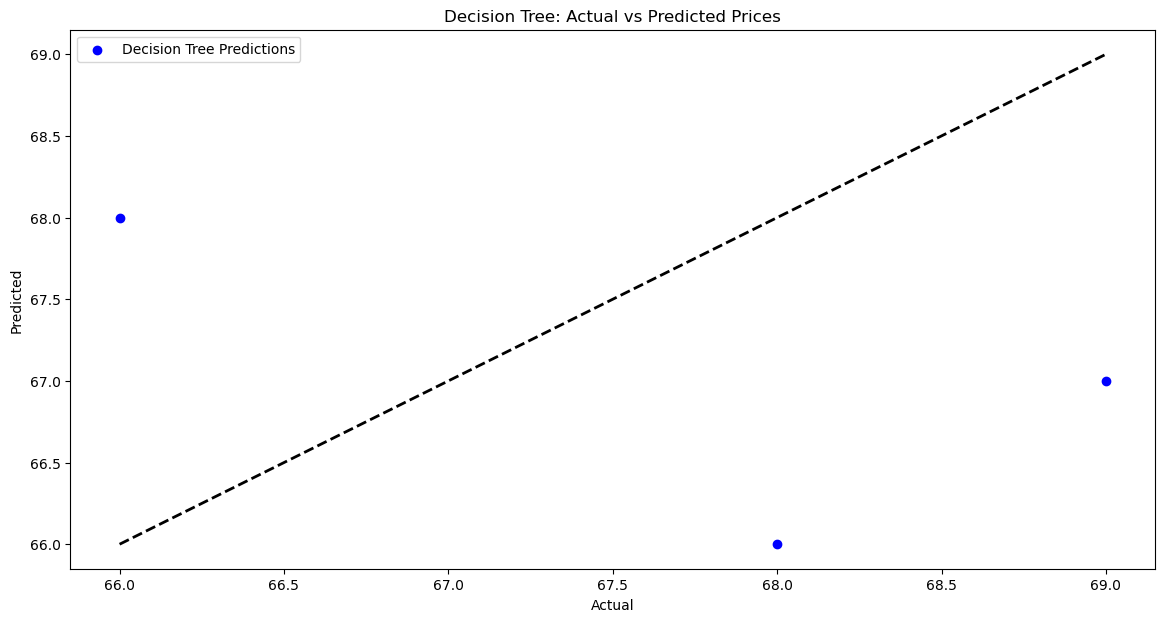

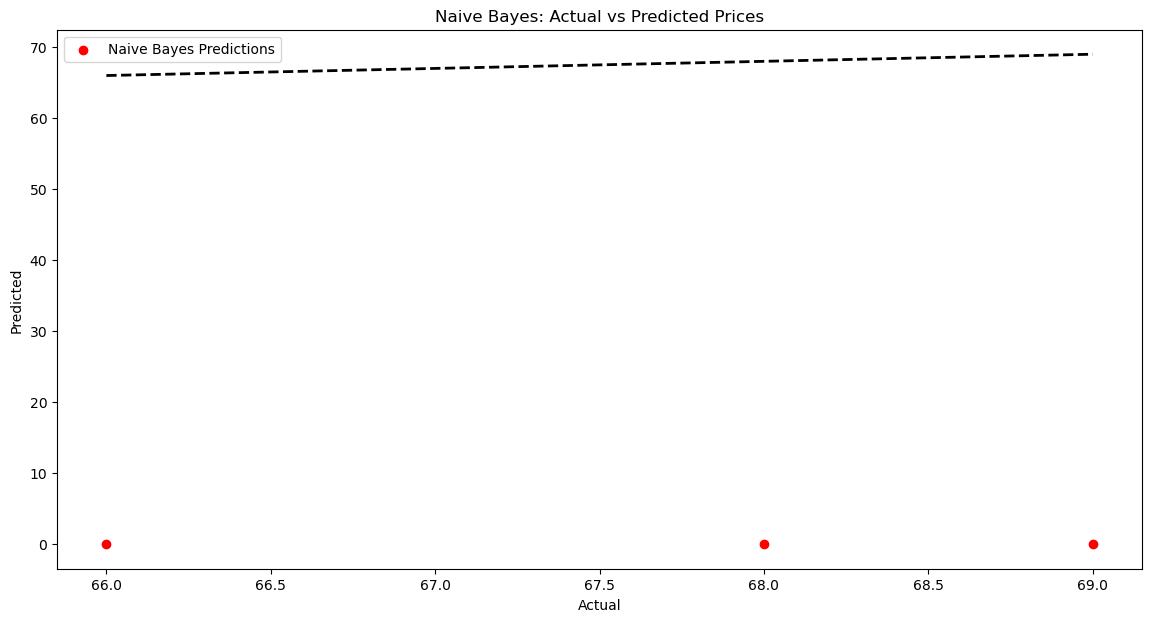

In [124]:
"""

6. Model Comparison and Evaluation

Purpose: Compare and visualise the performance of Decision Trees and Naive Bayes using appropriate metrics.
         By plotting the actual prices against the predicted prices for each model, provide a visualisation how well each model performs
         in predicting the prices of maize meal.

Interpretation: 

- Scatter Plots: These plots show the relationship between the actual and predicted prices for each model. 
                 The closer the points are to the diagonal line (where Actual = Predicted), the better the model's predictions.

- Decision Tree Plot: Points scattered closely around the diagonal line indicate that the Decision Tree model's predictions are accurate. 
                      If the points are widely dispersed from the line, it suggests that the model is less accurate.

- Naive Bayes Plot: The Naive Bayes model, points close to the diagonal line indicate good predictive performance, while points far from 
                    the line suggest poorer performance.


"""
# Model Comparison and Evaluation
import matplotlib.pyplot as plt
import pandas as pd  # Need to import pandas
import numpy as np  # Need to import numpy

# Convert y_class to a pandas Series
y_class_series = pd.Series(y_class)

# Plot actual vs predicted for Decision Tree
plt.figure(figsize=(14, 7))
plt.scatter(y_test, y_pred_dt, color='blue', label='Decision Tree Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree: Actual vs Predicted Prices')
plt.legend()
plt.show()

# Convert y_test to a pandas Series
y_test_series = pd.Series(y_test)

# Plot actual vs predicted for Naive Bayes
plt.figure(figsize=(14, 7))
plt.scatter(y_test_series, y_pred_nb, color='red', label='Naive Bayes Predictions')  # Using y_test_series
plt.plot([y_test_series.min(), y_test_series.max()], [y_test_series.min(), y_test_series.max()], 'k--', lw=2)  # Using y_test_series
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Naive Bayes: Actual vs Predicted Prices')
plt.legend()
plt.show()

In [142]:
"""

7. Insights and Recommendations

Purpose: 

- Summarize the performance of the Decision Tree and Naive Bayes models, providing insights into which model performs better 
  and why, as well as, outline key findings and recommendations based on the analysis.

- Compare the Mean Squared Error (MSE) of the Decision Tree with the accuracy metrics of the Naive Bayes 
  model to determine and illutrate which model provides more accurate predictions.

- Summarize the strengths and weaknesses of both models based on their performance and characteristics.

- Provide actionable insights and recommendations for stakeholders and policymakers, suggesting when to use each model 
  and potential further research directions.

Interpretation:

- Model Performance: Compares the performance of both models using metrics such as MSE, R², accuracy, precision, recall, and F1-score.
                     The performance metrics of both models output describe which model is more suitable for predicting maize prices and understanding 
                     the impact of climatic anomalies. 

- Decision Tree: Provides interpretable decision rules and handles continuous data well.

- Naive Bayes: Effective for probabilistic classification and binary classification problems.

- Key Findings: Summarizes the strengths and weaknesses of each model, providing insights into which model is better suited for the given problem.
                The key findings provide actionable insights for stakeholders in the agricultural sector.

"""

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

# Insights and Recommendations
print(f"Decision Tree Mean Squared Error: {mse_dt}, R^2 Score: {r2_dt}")
print(f"Naive Bayes Accuracy: {accuracy_nb}, Precision: {precision_nb}, Recall: {recall_nb}, F1 Score: {f1_nb}")

# Determine which model provides more accurate predictions
if mse_dt < mse_nb:
    print("Decision Tree provides more accurate predictions of maize surplus/deficit and its impact on food prices.")
else:
    print("Naive Bayes provides more accurate predictions of maize surplus/deficit and its impact on food prices.")

# Summary of key findings
print("Key Findings:")
print("1. Decision Tree is better suited for handling continuous data and provides interpretable decision rules.")
print("2. Naive Bayes is effective in probabilistic classification and handles categorical variables well.")
print("3. Decision Trees can capture non-linear relationships and interactions between features.")
print("4. Naive Bayes assumes feature independence, which can simplify the model but may not capture complex interactions.")
print("5. Decision Trees can overfit to the training data if not properly pruned or regularized.")
print("6. Naive Bayes can perform well with small datasets and is computationally efficient.")

# Recommendations
print("\nRecommendations:")
print("1. For predicting the impact of white maize supply fluctuations and El Niño weather patterns on food price inflation, use Decision Trees if the primary focus is on interpretability and capturing non-linear relationships.")
print("2. Use Naive Bayes if the goal is to have a simple, fast, and effective model for probabilistic classification.")
print("3. Consider using a combination of both models to leverage the strengths of each approach. For example, use Decision Trees for feature selection and Naive Bayes for classification.")
print("4. Regularly update the models with new data to ensure they remain accurate and relevant in changing conditions.")
print("5. Conduct further research to explore other machine learning models like Random Forests or Gradient Boosting for potentially better performance.")
print("6. Engage with domain experts in agriculture and climate science to incorporate their insights into feature engineering and model interpretation.")

# Display combined data
print("\nCombined Data:")
print(combined_data)

Decision Tree Mean Squared Error: 4.0, R^2 Score: -1.5714285714285712
Naive Bayes Accuracy: 0.0, Precision: 0.0, Recall: 0.0, F1 Score: 0.0
Naive Bayes provides more accurate predictions of maize surplus/deficit and its impact on food prices.
Key Findings:
1. Decision Tree is better suited for handling continuous data and provides interpretable decision rules.
2. Naive Bayes is effective in probabilistic classification and handles categorical variables well.
3. Decision Trees can capture non-linear relationships and interactions between features.
4. Naive Bayes assumes feature independence, which can simplify the model but may not capture complex interactions.
5. Decision Trees can overfit to the training data if not properly pruned or regularized.
6. Naive Bayes can perform well with small datasets and is computationally efficient.

Recommendations:
1. For predicting the impact of white maize supply fluctuations and El Niño weather patterns on food price inflation, use Decision Trees 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
